<a href="https://colab.research.google.com/github/Lucky-Riot/Mini_projet_Deep_learning/blob/main/Copie_de_tuto2_ynov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!unzip langage_sign.zip

# TP 2: vers un modele plus complexe
**Objectif :**
- Apprendre à construire et à entraîner un réseau de neurones convolutif (CNN) en utilisant TensorFlow/Keras.
- Comprendre l'ajout progressif de couches convolutionnelles pour améliorer la complexité du modèle.

## requirements

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

import warnings
warnings.filterwarnings('ignore')
#Data İnput
import os
for dirname, _, filenames in os.walk('./langage_sign/Sign-language-digits-dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

%load_ext autoreload
%autoreload 2


./langage_sign/Sign-language-digits-dataset/Y.npy
./langage_sign/Sign-language-digits-dataset/X.npy


## Data visualisation

In [ ]:
path_img_example = "./langage_sign/Sign-Language-Digits-Dataset/Examples/"


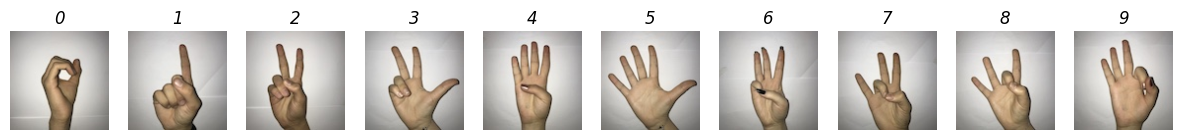

In [ ]:

fig, axs = plt.subplots(1,10, figsize=(15,2))
for i in range(0, 10):
    image = Image.open(os.path.join(path_img_example, 'example_'+ str(i) +'.JPG'))
    axs[i].imshow(image)
    axs[i].axis('off')
    axs[i].set_title(str(i), fontstyle='italic')
plt.show()

Pour l'exemple l'image `sign_0.jpeg` est sélectionnée en tant qu'objet de l'évaluation.

![sign_0](./Sign-Language-Digits-Dataset/Examples/example_0.JPG)

## preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D,MaxPool2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import SGD

train_data_dir = './langage_sign/data/inputs/train/'
validation_data_dir = './langage_sign/data/inputs/valid/'
test_data_dir = './langage_sign/data/inputs/test'

input_size = (100, 100)

# normalisation
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=input_size,
    batch_size=16,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=input_size,
    batch_size=16,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=input_size,
    batch_size=16,
    class_mode='categorical')

Found 1644 images belonging to 10 classes.
Found 200 images belonging to 10 classes.
Found 218 images belonging to 10 classes.


## Train model


### parametres

In [ ]:
input_size = (100, 100)
num_classes = 10
num_epoch = 200

### Modele simple


In [ ]:
model = Sequential([
    Flatten(input_shape=(input_size[0], input_size[1], 3)),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 30000)             0         
                                                                 
 dense (Dense)               (None, 10)                300010    
                                                                 
Total params: 300010 (1.14 MB)
Trainable params: 300010 (1.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer=SGD(lr=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=num_epoch,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size)

test_loss, test_accuracy = model.evaluate(test_generator)
print("Test accuracy:", test_accuracy)


Epoch 1/200
102/102 [==============================] - 3s 27ms/step - loss: 51.7435 - accuracy: 0.1136 - val_loss: 35.8204 - val_accuracy: 0.0990
Epoch 2/200
102/102 [==============================] - 2s 22ms/step - loss: 44.7920 - accuracy: 0.1364 - val_loss: 22.8819 - val_accuracy: 0.2292
Epoch 3/200
102/102 [==============================] - 3s 29ms/step - loss: 34.5566 - accuracy: 0.1990 - val_loss: 40.5452 - val_accuracy: 0.1667
Epoch 4/200
102/102 [==============================] - 2s 22ms/step - loss: 23.3744 - accuracy: 0.2826 - val_loss: 33.6917 - val_accuracy: 0.2344
Epoch 5/200
102/102 [==============================] - 2s 23ms/step - loss: 18.1527 - accuracy: 0.3557 - val_loss: 17.8316 - val_accuracy: 0.2812
Epoch 6/200
102/102 [==============================] - 2s 22ms/step - loss: 14.6234 - accuracy: 0.4060 - val_loss: 12.9098 - val_accuracy: 0.3125
Epoch 7/200
102/102 [==============================] - 3s 26ms/step - loss: 13.1085 - accuracy: 0.4238 - val_loss: 11.3860 -

In [ ]:
model.save("./langage_sign/data/models/model_simple.h5")

### Modele avec une couche de convolution


In [ ]:

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(input_size[0], input_size[1], 3)), # Correction: Ajout de la couche Conv2D en tant que première couche
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compiler le modèle
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Résumé du modèle
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 flatten_1 (Flatten)         (None, 76832)             0         
                                                                 
 dense_1 (Dense)             (None, 32)                2458656   
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 2459882 (9.38 MB)
Trainable params: 2459882 (9.38 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [ ]:
model.compile(optimizer=SGD(lr=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=num_epoch,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size)

test_loss, test_accuracy = model.evaluate(test_generator)
print("Test accuracy:", test_accuracy)

Epoch 1/200
102/102 [==============================] - 12s 113ms/step - loss: 2.3146 - accuracy: 0.0866 - val_loss: 2.3026 - val_accuracy: 0.1042
Epoch 2/200
102/102 [==============================] - 12s 115ms/step - loss: 2.3028 - accuracy: 0.0799 - val_loss: 2.3026 - val_accuracy: 0.0990
Epoch 3/200
102/102 [==============================] - 13s 127ms/step - loss: 2.3028 - accuracy: 0.0885 - val_loss: 2.3026 - val_accuracy: 0.0990
Epoch 4/200
102/102 [==============================] - 12s 115ms/step - loss: 2.3028 - accuracy: 0.0854 - val_loss: 2.3025 - val_accuracy: 0.1042
Epoch 5/200
102/102 [==============================] - 13s 125ms/step - loss: 2.3029 - accuracy: 0.0934 - val_loss: 2.3026 - val_accuracy: 0.0990
Epoch 6/200
102/102 [==============================] - 10s 98ms/step - loss: 2.3028 - accuracy: 0.0952 - val_loss: 2.3026 - val_accuracy: 0.0938
Epoch 7/200
102/102 [==============================] - 12s 114ms/step - loss: 2.3029 - accuracy: 0.0903 - val_loss: 2.3026 - 

In [ ]:
model.save("./langage_sign/data/models/model_complexe_1.h5")

### Modele avec deux couches de convolution

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(input_size[0], input_size[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(num_classes, activation='softmax')
])

# Compiler le modèle
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Résumé du modèle
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 49, 49, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 33856)             0         
                                                                 
 dense_3 (Dense)             (None, 10)               

In [ ]:
model.compile(optimizer=SGD(lr=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size)

test_loss, test_accuracy = model.evaluate(test_generator)
print("Test accuracy:", test_accuracy)

Epoch 1/50
102/102 [==============================] - 23s 220ms/step - loss: 2.3000 - accuracy: 0.1327 - val_loss: 2.2693 - val_accuracy: 0.1562
Epoch 2/50
102/102 [==============================] - 22s 212ms/step - loss: 2.2090 - accuracy: 0.2684 - val_loss: 2.1031 - val_accuracy: 0.3646
Epoch 3/50
102/102 [==============================] - 20s 200ms/step - loss: 1.8544 - accuracy: 0.4306 - val_loss: 1.4988 - val_accuracy: 0.5677
Epoch 4/50
102/102 [==============================] - 22s 216ms/step - loss: 1.1700 - accuracy: 0.6419 - val_loss: 1.0459 - val_accuracy: 0.6562
Epoch 5/50
102/102 [==============================] - 20s 196ms/step - loss: 0.8462 - accuracy: 0.7279 - val_loss: 0.9025 - val_accuracy: 0.7292
Epoch 6/50
102/102 [==============================] - 22s 212ms/step - loss: 0.6964 - accuracy: 0.7697 - val_loss: 0.8887 - val_accuracy: 0.7396
Epoch 7/50
102/102 [==============================] - 21s 205ms/step - loss: 0.5857 - accuracy: 0.8102 - val_loss: 0.8066 - val_ac

In [ ]:
model.save("./langage_sign/data/models/model_complexe_2.h5")

### Modele avec trois couches de convolution

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(input_size[0], input_size[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(num_classes, activation='softmax')
])

# Compiler le modèle
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Résumé du modèle
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 49, 49, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 10, 10, 128)      

In [ ]:
model.compile(optimizer=SGD(lr=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size)

test_loss, test_accuracy = model.evaluate(test_generator)
print("Test accuracy:", test_accuracy)


Epoch 1/50
102/102 [==============================] - 29s 279ms/step - loss: 2.2998 - accuracy: 0.1247 - val_loss: 2.2680 - val_accuracy: 0.2552
Epoch 2/50
102/102 [==============================] - 28s 275ms/step - loss: 2.2333 - accuracy: 0.2150 - val_loss: 2.1817 - val_accuracy: 0.1823
Epoch 3/50
102/102 [==============================] - 29s 284ms/step - loss: 2.0005 - accuracy: 0.3704 - val_loss: 1.7111 - val_accuracy: 0.5260
Epoch 4/50
102/102 [==============================] - 28s 278ms/step - loss: 1.2661 - accuracy: 0.6124 - val_loss: 0.9924 - val_accuracy: 0.6719
Epoch 5/50
102/102 [==============================] - 28s 278ms/step - loss: 0.8136 - accuracy: 0.7328 - val_loss: 0.8400 - val_accuracy: 0.7292
Epoch 6/50
102/102 [==============================] - 28s 274ms/step - loss: 0.6947 - accuracy: 0.7604 - val_loss: 0.7685 - val_accuracy: 0.7656
Epoch 7/50
102/102 [==============================] - 28s 274ms/step - loss: 0.5802 - accuracy: 0.7905 - val_loss: 0.7899 - val_ac

In [ ]:
model.save("./langage_sign/data/models/model_complexe_3.h5")

## Call Saimple

* model 0: 'model_complexe_1.h5'     
* model 1: 'model_complexe_2.h5'    
* model 2: 'model_complexe_3.h5'

In [ ]:
import os
import sys
import numpy as np
import pandas as pd
sys.path.append('/content/langage_sign/scripts/')
import saimple_api as api
import utils as utils


In [ ]:
VRS = "v2"
URL = "https://app.saimple.com/api" # put your url
resources = os.path.join('.', 'data')

## a completer
user, mdp = "mohammed.attik", "mEi4o&"
# "user", "mdp"

api = api.SaimpleAPI(URL, VRS, user, mdp)

In [ ]:
resources='/content/langage_sign/data/'
# Sign Language
image_path_sign = os.path.join(resources,'inputs/test/0/IMG_4139.JPG')
# Save image name, needed for evaluations
image_sign_name  = os.path.basename(image_path_sign)

# Post images
# api.post_image(image_path_sign)
sign_input_id = api.post_input(image_path_sign)

list_evalId = []
list_model = ['model_complexe_1.h5', 'model_complexe_2.h5', 'model_complexe_3.h5']

for i in range(0, len(list_model)):
    print("Evaluation with model :" + list_model[i])
    model_path_sign = os.path.join(resources, 'models/'+list_model[i])
    # Post models & save IDs models
    sign_model_id  = api.post_model(model_path_sign)


    conf_eval_sign  = {
                    "name": "Eval detect crater",
                    "dataType": "Image",
                    "input": sign_input_id['inputId'],
                    "model": sign_model_id['modelId'],
                    "normalize": "Yes",
                    "noise": {
                                "mode": "ADDITIVE",
                                "intensity": "0.00001"
                            }
                    }

    print((conf_eval_sign))
    evalId = api.post_evaluations(conf_eval_sign)
    list_evalId.append(evalId)

    print("Evaluation id: ", evalId)
    print("  ")
    api.get_evaluations(evalId)

Evaluation with model :model_complexe_1.h5
Successfully uploaded model : model_complexe_1.h5
{'name': 'Eval detect crater', 'dataType': 'Image', 'input': 'f06ecbb0-2fcc-11ef-ba96-02420a0000e1', 'model': '67720976-2ed7-11ef-9f70-02420a0000e1', 'normalize': 'Yes', 'noise': {'mode': 'ADDITIVE', 'intensity': '0.00001'}}
Evaluation id:  f50c3fc2-2fcc-11ef-889d-02420a0000e1
  
Evaluation with model :model_complexe_2.h5
Successfully uploaded model : model_complexe_2.h5
{'name': 'Eval detect crater', 'dataType': 'Image', 'input': 'f06ecbb0-2fcc-11ef-ba96-02420a0000e1', 'model': '68d5cf96-2ed7-11ef-985f-02420a0000e1', 'normalize': 'Yes', 'noise': {'mode': 'ADDITIVE', 'intensity': '0.00001'}}
Evaluation id:  f62df12a-2fcc-11ef-8e09-02420a0000e1
  
Evaluation with model :model_complexe_3.h5
Successfully uploaded model : model_complexe_3.h5
{'name': 'Eval detect crater', 'dataType': 'Image', 'input': 'f06ecbb0-2fcc-11ef-ba96-02420a0000e1', 'model': '6a77c6f6-2ed7-11ef-85c7-02420a0000e1', 'normaliz

In [ ]:
list_evalId

['f50c3fc2-2fcc-11ef-889d-02420a0000e1',
 'f62df12a-2fcc-11ef-8e09-02420a0000e1',
 'f74da53c-2fcc-11ef-b70f-02420a0000e1']

In [ ]:
from PIL import Image
import time

list_dominance = []
list_relevance = []
list_input = []
class_orig = 0
for i in range(0, len(list_evalId)):

    evalId = list_evalId[i]
    json_eval = api.get_evaluations(evalId)
    filename_img_orig = os.path.join('./langage_sign/data/inputs/test/',str(class_orig),json_eval['inputName'])
    img = np.array(Image.open(filename_img_orig), dtype= float)

    # Waiting for the end of the evaluation
    while (api.get_eval_status(evalId) == 'IN_PROGRESS'):
        print("\rPlease wait the end of the evaluation.", end='')
        time.sleep(2)
    #print('\n')

    if (api.get_eval_status(evalId) == "DONE"):
        list_input.append(img)

        dominance = api.get_dominance(evalId)['classes']
        df_dominance = pd.DataFrame(dominance)
        list_dominance.append(df_dominance)

        relevance = api.get_relevance(evalId)['data']
        df_relevance = pd.DataFrame(relevance[class_orig])
        #df_relevance = pd.DataFrame((np.transpose(relevance[0])[0]))
        list_relevance.append(df_relevance)

        print(" --> Evaluation "+str(evalId)+" is finished.")
        print(" ")
    elif (api.get_evaluations(evalId)['status'] == "FAILED"):
        print(" --> Evaluation "+str(evalId)+" failed.")
        print(" ")
    print("  ")

Please wait the end of the evaluation. --> Evaluation f50c3fc2-2fcc-11ef-889d-02420a0000e1 is finished.
 
  
 --> Evaluation f62df12a-2fcc-11ef-8e09-02420a0000e1 is finished.
 
  
 --> Evaluation f74da53c-2fcc-11ef-b70f-02420a0000e1 is finished.
 
  


In [ ]:
pd.DataFrame(relevance[0])

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,"[-1, 0, -1]","[0, -1, -1]","[0, -1, 0]","[-1, -1, -1]","[0, -1, -1]","[-1, -1, -1]","[-1, -1, -1]","[0, 0, -1]","[-1, 0, -1]","[0, 0, 0]",...,"[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]"
1,"[-1, -1, -1]","[-1, -1, -1]","[-1, -1, -1]","[-1, -1, -1]","[-1, -1, -1]","[-1, -1, -1]","[-1, -1, -1]","[-1, -1, -1]","[0, 0, -1]","[-1, -1, -1]",...,"[-1, -1, -1]","[-1, -1, -1]","[0, -1, -1]","[0, -1, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]"
2,"[0, 0, 0]","[-1, -1, -1]","[-1, -1, -1]","[-1, -1, -1]","[-1, -1, -1]","[-1, -1, -1]","[-1, -1, -1]","[-1, -1, -1]","[0, -1, -1]","[-1, -1, -1]",...,"[-1, -1, -1]","[-1, -1, -1]","[-1, -1, -1]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]"
3,"[-1, 0, 0]","[0, 0, -1]","[-1, -1, -1]","[-1, -1, -1]","[-1, -1, -1]","[-1, -1, -1]","[-1, -1, -1]","[-1, -1, -1]","[0, 0, 0]","[0, -1, -1]",...,"[-1, -1, -1]","[-1, -1, -1]","[-1, -1, -1]","[0, 0, -1]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]"
4,"[0, 0, 0]","[0, 0, -1]","[-1, 0, 0]","[0, 0, -1]","[0, 0, 0]","[-1, 0, 0]","[-1, -1, -1]","[0, 0, -1]","[0, 0, 0]","[0, 0, 0]",...,"[-1, -1, -1]","[-1, -1, -1]","[-1, -1, -1]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]",...,"[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]"
96,"[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]",...,"[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]"
97,"[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]",...,"[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]"
98,"[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]",...,"[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]"


In [ ]:
list_dominance

[   id           min           max     status
 0   0  9.312058e-01  9.318775e-01   Dominant
 1   1  4.502835e-04  4.561500e-04  Dominated
 2   2  3.153647e-02  3.191870e-02  Dominated
 3   3  8.860350e-06  8.967432e-06  Dominated
 4   4  1.802448e-06  1.824644e-06  Dominated
 5   5  1.665807e-08  1.685623e-08  Dominated
 6   6  3.473345e-02  3.511901e-02  Dominated
 7   7  7.285579e-04  7.369943e-04  Dominated
 8   8  4.863565e-04  4.917768e-04  Dominated
 9   9  1.192349e-04  1.206147e-04  Dominated,
    id           min           max     status
 0   0  9.999502e-01  9.999508e-01   Dominant
 1   1  1.022251e-07  1.037354e-07  Dominated
 2   2  4.898351e-05  4.965529e-05  Dominated
 3   3  1.448235e-10  1.467204e-10  Dominated
 4   4  3.580378e-14  3.627077e-14  Dominated
 5   5  3.045317e-16  3.084179e-16  Dominated
 6   6  9.467690e-09  9.579785e-09  Dominated
 7   7  3.304525e-08  3.347236e-08  Dominated
 8   8  1.563979e-08  1.583184e-08  Dominated
 9   9  9.669171e-11  9.796977e-1

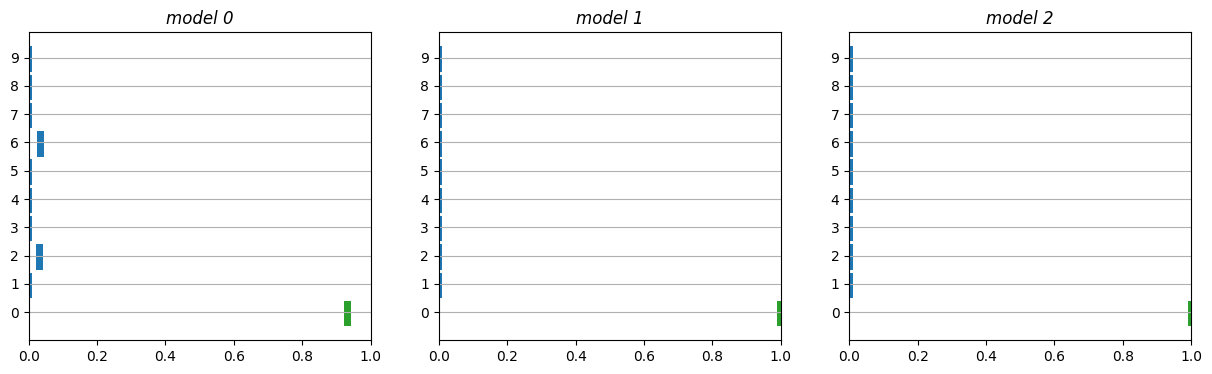

In [ ]:
utils.showDominance_alleval(list_dominance, list_input, alpha=0.8)

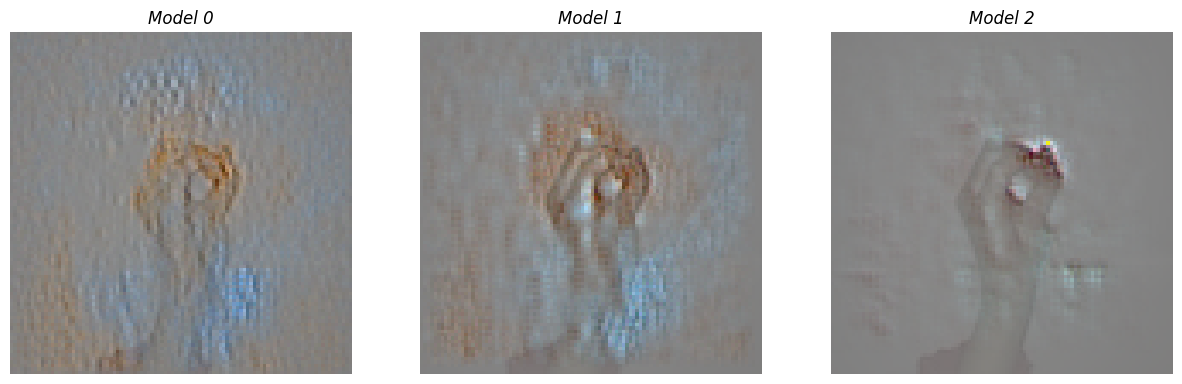

In [ ]:
utils.showRelevance_alleval(list_relevance, filename_img_orig, alpha=0.9)